In [1]:
import pandas as pd
import numpy as np
#from feature_generators import TS_feature_generator_functions as fg
from timeit import default_timer as dt
from datetime import datetime
import re
from sklearn.externals import joblib
from time import time
from collections import Counter

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ec2-user/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
all_prod=pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/invoice_CG_allprod_180115.csv')


In [4]:
len(all_prod)

530146

In [5]:
buyer_supplier_3m = pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/add_features_buyer_supplier_180113.csv')
buyer_supplier_3m.describe()

,Unnamed: 0,rownum,buyer_supplier_prevyr_inv_cnt,buyer_supplier_prevyr_ave_fin_amt,buyer_supplier_prevyr_late_days,buyer_supplier_prevyr_isLate,buyer_supplier_prevyr_dr,buyer_supplier_prevyr_term,buyer_supplier_3m_inv_cnt,buyer_supplier_3m_ave_fin_amt,buyer_supplier_3m_std_fin_amt,buyer_supplier_3m_dr,buyer_supplier_3m_term,buyer_supplier_3m_late_days,buyer_supplier_3m_isLate
count,525709.00000,525709.000000,525709.000000,5.224010e+05,522401.000000,522401.000000,5.224010e+05,522401.000000,525709.000000,5.224010e+05,5.224010e+05,5.206150e+05,520615.000000,520615.000000,520615.000000
mean,262854.00000,265206.865578,3038.680822,1.145028e+05,3.232914,0.290288,1.968097e-13,62.909857,3038.680822,1.145028e+05,6.472188e+04,1.709882e-13,62.366142,3.280255,0.288667
std,151759.26067,152994.370265,6288.316424,2.206505e+06,14.243259,0.400561,9.566881e-12,81.555554,6288.316424,2.206505e+06,7.856054e+05,1.424348e-11,77.560486,14.657887,0.402826
min,0.00000,1.000000,0.000000,1.518362e-02,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.518362e-02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,131427.00000,132962.000000,165.000000,1.234347e+03,0.000000,0.000000,0.000000e+00,42.147541,165.000000,1.234347e+03,2.382261e+03,0.000000e+00,42.019861,0.000000,0.000000
50%,262854.00000,265151.000000,476.000000,4.616623e+03,0.000000,0.000000,0.000000e+00,51.872093,476.000000,4.616623e+03,7.158654e+03,0.000000e+00,50.789617,0.000000,0.000000
75%,394281.00000,397927.000000,1494.000000,1.490772e+04,2.884673,0.829181,0.000000e+00,84.194667,1494.000000,1.490772e+04,1.829068e+04,0.000000e+00,82.206897,2.576539,0.813791
max,525708.00000,530143.000000,24594.000000,2.340783e+08,1365.000000,1.000000,8.483630e-10,1727.800000,24594.000000,2.340783e+08,5.126257e+07,1.646379e-09,1727.800000,1365.000000,1.000000


In [6]:
client_3m = pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/add_features_client_180113.csv')
client_3m.describe()

,Unnamed: 0,rownum,client_prevyr_inv_cnt,client_prevyr_ave_fin_amt,client_prevyr_late_days,client_prevyr_isLate,client_prevyr_dr,client_prevyr_term,client_3m_inv_cnt,client_3m_ave_fin_amt,client_3m_std_fin_amt,client_3m_dr,client_3m_term,client_3m_late_days,client_3m_isLate
count,528147.000000,528147.000000,528147.000000,5.266410e+05,526641.000000,526641.000000,5.266410e+05,526641.000000,528147.000000,5.266410e+05,5.266410e+05,525982.000000,525982.000000,525982.000000,525982.000000
mean,264073.000000,265253.320312,3805.503375,1.432089e+05,3.222632,0.290215,9.259571e-07,63.074029,3805.503375,1.432089e+05,1.106135e+05,0.000002,62.627198,3.302951,0.288840
std,152463.050648,152961.581858,6201.715948,2.346330e+06,13.752334,0.392542,5.520553e-05,81.139452,6201.715948,2.346330e+06,1.379473e+06,0.000240,77.102573,14.214682,0.394005
min,0.000000,0.000000,0.000000,1.518362e-02,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.518362e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,132036.500000,132726.500000,344.000000,1.292390e+03,0.000000,0.000000,0.000000e+00,42.036276,344.000000,1.292390e+03,3.390124e+03,0.000000,41.944266,0.000000,0.000000
50%,264073.000000,265374.000000,1130.000000,5.365263e+03,0.017857,0.003268,0.000000e+00,52.843898,1130.000000,5.365263e+03,9.103340e+03,0.000000,51.492027,0.000000,0.000000
75%,396109.500000,397752.500000,3777.000000,1.644420e+04,3.063358,0.792593,0.000000e+00,82.122642,3777.000000,1.644420e+04,2.217673e+04,0.000000,81.576679,2.703962,0.777649
max,528146.000000,530143.000000,24594.000000,1.030192e+08,1365.000000,1.000000,8.695652e-03,1727.800000,24594.000000,1.030192e+08,4.443162e+07,0.052632,1727.800000,1365.000000,1.000000


In [7]:
# buyer_features=pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/late_days_features_buyer.csv')
# seller_features=pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/late_days_features_seller.csv')
buyer_seller_features=pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/add_features_buyer_supplier_180114.csv')
client_features=pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/add_features_client_180114.csv')
print(len(buyer_seller_features), len(client_features))

(530146, 530146)


In [8]:
# buyer_features=pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/late_days_features_buyer.csv')
# seller_features=pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/late_days_features_seller.csv')
buyer_seller_features_dr=pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/add_features_buyer_supplier_180116_dr.csv')
client_features_dr=pd.read_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/add_features_client_180116_dr.csv')
print(len(buyer_seller_features_dr), len(client_features_dr))

(530146, 530146)


In [9]:
tables = [all_prod, buyer_seller_features, client_features, buyer_seller_features_dr, client_features_dr, buyer_supplier_3m, client_3m]
for table in tables:
    table.drop(['Unnamed: 0'], axis = 1, inplace= True)
    table.sort_values(by=['doc_id'], inplace=True)
    table.reset_index(inplace = True)
    print(table.head())

    index  Unnamed: 0.1 cty_code            doc_id  supplier_id     buyer_id  \
0  450073        335680       SP  113NT3SXHF-19069    100010823  100004692.0   
1  524120         25138       SG   113NT3SXHF-2564    100004586  100015181.0   
2  524121         25139       SG   113NT3SXHF-5029    100004586  100015182.0   
3  524122         25140       SG  113XBHSBFT-10433    100004672  100004535.0   
4  524124         25142       SG  113XBHSBFT-10599    100004672  100002504.0   

  doc_type_code     deal_id fin_flag    rec_id  ...    doc_usd_amt  \
0           INV  TF540B0037        Y   4005372  ...    67890.63000   
1           INV  TF540S0646        Y   3995308  ...    51747.40272   
2           INV  TF540S0648        Y   3996605  ...    63689.11104   
3           INV  TF540S0001        Y  12498608  ...    92612.18000   
4           INV  TF540S0001        Y   8435131  ...    52810.25000   

    fin_usd_amt  os_usd_amt  pymt_usd_amt product bucket_61  bucket_31_60  \
0  67890.630000      

In [10]:
data = all_prod

In [11]:
print(len(data.columns), len(buyer_seller_features.columns))
for col in buyer_seller_features.columns:
    data[col] = buyer_seller_features[col]
print(len(data.columns))

(57, 35)
90


In [12]:
print(len(data.columns), len(buyer_seller_features_dr.columns))
for col in buyer_seller_features_dr.columns:
    data[col] = buyer_seller_features_dr[col]
print(len(data.columns))

(90, 7)
90


In [13]:
print(len(data.columns), len(client_features.columns))
for col in client_features.columns:
    data[col] = client_features[col]
print(len(data.columns))

(90, 35)
122


In [14]:
print(len(data.columns), len(client_features_dr.columns))
for col in client_features_dr.columns:
    data[col] = client_features_dr[col]
print(len(data.columns))

(122, 7)
122


In [15]:
data_col = list(data.columns)
data_col_partial = [x for x in data_col if (('_6m_' in x) or ('_3m_' in x) or('_prevyr_' in x))  ]
data_col_partial

['buyer_supplier_prevyr_inv_cnt',
 'buyer_supplier_prevyr_ave_fin_amt',
 'buyer_supplier_prevyr_std_fin_amt',
 'buyer_supplier_prevyr_late_days',
 'buyer_supplier_prevyr_isLate',
 'buyer_supplier_prevyr_dr',
 'buyer_supplier_prevyr_term',
 'buyer_supplier_6m_inv_cnt',
 'buyer_supplier_6m_ave_fin_amt',
 'buyer_supplier_6m_std_fin_amt',
 'buyer_supplier_6m_dr',
 'buyer_supplier_6m_term',
 'buyer_supplier_6m_late_days',
 'buyer_supplier_6m_isLate',
 'buyer_supplier_3m_inv_cnt',
 'buyer_supplier_3m_ave_fin_amt',
 'buyer_supplier_3m_std_fin_amt',
 'buyer_supplier_3m_dr',
 'buyer_supplier_3m_term',
 'buyer_supplier_3m_late_days',
 'buyer_supplier_3m_isLate',
 'client_prevyr_inv_cnt',
 'client_prevyr_ave_fin_amt',
 'client_prevyr_std_fin_amt',
 'client_prevyr_late_days',
 'client_prevyr_isLate',
 'client_prevyr_dr',
 'client_prevyr_term',
 'client_6m_inv_cnt',
 'client_6m_ave_fin_amt',
 'client_6m_std_fin_amt',
 'client_6m_dr',
 'client_6m_term',
 'client_6m_late_days',
 'client_6m_isLate',
 

In [16]:
data.describe()

,index,Unnamed: 0.1,supplier_id,buyer_id,rec_id,doc_ccy_amt,tenor,grace_period,fin_tenor,to_seq_no,...,client_6m_term,client_6m_late_days,client_6m_isLate,client_3m_inv_cnt,client_3m_ave_fin_amt,client_3m_std_fin_amt,client_3m_dr,client_3m_term,client_3m_late_days,client_3m_isLate
count,530146.000000,530146.000000,5.301460e+05,5.301460e+05,5.301460e+05,5.301460e+05,530146.000000,530146.000000,530146.000000,530146.000000,...,0.0,0.0,0.0,530146.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,265072.500000,175737.814815,1.001715e+08,1.001450e+08,3.392774e+09,1.445162e+07,57.600972,5.780411,62.708799,1568.445094,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
std,153040.112242,105135.592937,1.221654e+05,1.276050e+05,2.231754e+09,9.775013e+07,80.304186,19.384246,82.232595,5973.482375,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,1.000000e+08,1.000000e+08,1.020223e+06,3.000000e-02,-21.000000,0.000000,0.000000,2.000000,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,132536.250000,94595.250000,1.000163e+08,1.000161e+08,1.427385e+09,1.274260e+04,30.000000,0.000000,40.000000,34.000000,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,265072.500000,173899.000000,1.002247e+08,1.001135e+08,3.339098e+09,1.167680e+05,60.000000,0.000000,52.000000,76.000000,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,397608.750000,251950.750000,1.002851e+08,1.002809e+08,5.279742e+09,1.689500e+06,66.000000,0.000000,83.000000,1002.000000,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
max,530145.000000,384612.000000,1.004131e+08,1.004197e+08,7.796394e+09,1.735297e+10,2182.000000,750.000000,9030.000000,94013.000000,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.drop(columns=data_col_partial, inplace=True)
data.describe()

,index,Unnamed: 0.1,supplier_id,buyer_id,rec_id,doc_ccy_amt,tenor,grace_period,fin_tenor,to_seq_no,...,client_past_inv_cnt,client_annual_inv_cnt,client_ave_fin_amt,client_ave_annual_fin_amt,client_std_fin_amt,client_late_days,client_isLate,client_dr,client_term,client_cty
count,530146.000000,530146.000000,5.301460e+05,5.301460e+05,5.301460e+05,5.301460e+05,530146.000000,530146.000000,530146.000000,530146.000000,...,530146.000000,530146.000000,5.281470e+05,5.281470e+05,5.281470e+05,528147.000000,528147.000000,528147.000000,528147.000000,530146.000000
mean,265072.500000,175737.814815,1.001715e+08,1.001450e+08,3.392774e+09,1.445162e+07,57.600972,5.780411,62.708799,1568.445094,...,6930.149759,6930.149759,1.597739e+05,7.124596e+07,1.498995e+05,2.929915,0.291302,0.016614,63.644382,0.998136
std,153040.112242,105135.592937,1.221654e+05,1.276050e+05,2.231754e+09,9.775013e+07,80.304186,19.384246,82.232595,5973.482375,...,11837.587063,11837.587063,2.559360e+06,3.607321e+08,1.579708e+06,12.712084,0.388271,0.040552,81.375013,0.077743
min,0.000000,0.000000,1.000000e+08,1.000000e+08,1.020223e+06,3.000000e-02,-21.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,1.518362e-02,1.518362e-02,0.000000e+00,0.000000,0.000000,-0.278039,0.000000,0.000000
25%,132536.250000,94595.250000,1.000163e+08,1.000161e+08,1.427385e+09,1.274260e+04,30.000000,0.000000,40.000000,34.000000,...,542.000000,542.000000,2.646629e+03,3.066006e+06,3.867042e+03,0.000000,0.000000,0.000000,42.733889,1.000000
50%,265072.500000,173899.000000,1.002247e+08,1.001135e+08,3.339098e+09,1.167680e+05,60.000000,0.000000,52.000000,76.000000,...,2021.000000,2021.000000,6.526422e+03,1.251786e+07,1.443307e+04,0.078151,0.010307,0.000477,53.285319,1.000000
75%,397608.750000,251950.750000,1.002851e+08,1.002809e+08,5.279742e+09,1.689500e+06,66.000000,0.000000,83.000000,1002.000000,...,6821.000000,6821.000000,1.734076e+04,9.129592e+07,4.946372e+04,3.367371,0.704683,0.003505,84.317999,1.000000
max,530145.000000,384612.000000,1.004131e+08,1.004197e+08,7.796394e+09,1.735297e+10,2182.000000,750.000000,9030.000000,94013.000000,...,61611.000000,61611.000000,1.030192e+08,1.648070e+10,4.397205e+07,1365.000000,1.000000,0.999212,1727.800000,4.000000


In [18]:
data_all = data.merge(buyer_supplier_3m, how = 'left', on = 'doc_id').merge(client_3m, how = 'left', on = 'doc_id')
data_all.describe()

,index_x,Unnamed: 0.1,supplier_id,buyer_id,rec_id,doc_ccy_amt,tenor,grace_period,fin_tenor,to_seq_no,...,client_prevyr_isLate,client_prevyr_dr,client_prevyr_term,client_3m_inv_cnt,client_3m_ave_fin_amt,client_3m_std_fin_amt,client_3m_dr,client_3m_term,client_3m_late_days,client_3m_isLate
count,530146.000000,530146.000000,5.301460e+05,5.301460e+05,5.301460e+05,5.301460e+05,530146.000000,530146.000000,530146.000000,530146.000000,...,526641.000000,5.266410e+05,526641.000000,528147.000000,5.266410e+05,5.266410e+05,525982.000000,525982.000000,525982.000000,525982.000000
mean,265072.500000,175737.814815,1.001715e+08,1.001450e+08,3.392774e+09,1.445162e+07,57.600972,5.780411,62.708799,1568.445094,...,0.290215,9.259571e-07,63.074029,3805.503375,1.432089e+05,1.106135e+05,0.000002,62.627198,3.302951,0.288840
std,153040.112242,105135.592937,1.221654e+05,1.276050e+05,2.231754e+09,9.775013e+07,80.304186,19.384246,82.232595,5973.482375,...,0.392542,5.520553e-05,81.139452,6201.715948,2.346330e+06,1.379473e+06,0.000240,77.102573,14.214682,0.394005
min,0.000000,0.000000,1.000000e+08,1.000000e+08,1.020223e+06,3.000000e-02,-21.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000e+00,0.000000,0.000000,1.518362e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,132536.250000,94595.250000,1.000163e+08,1.000161e+08,1.427385e+09,1.274260e+04,30.000000,0.000000,40.000000,34.000000,...,0.000000,0.000000e+00,42.036276,344.000000,1.292390e+03,3.390124e+03,0.000000,41.944266,0.000000,0.000000
50%,265072.500000,173899.000000,1.002247e+08,1.001135e+08,3.339098e+09,1.167680e+05,60.000000,0.000000,52.000000,76.000000,...,0.003268,0.000000e+00,52.843898,1130.000000,5.365263e+03,9.103340e+03,0.000000,51.492027,0.000000,0.000000
75%,397608.750000,251950.750000,1.002851e+08,1.002809e+08,5.279742e+09,1.689500e+06,66.000000,0.000000,83.000000,1002.000000,...,0.792593,0.000000e+00,82.122642,3777.000000,1.644420e+04,2.217673e+04,0.000000,81.576679,2.703962,0.777649
max,530145.000000,384612.000000,1.004131e+08,1.004197e+08,7.796394e+09,1.735297e+10,2182.000000,750.000000,9030.000000,94013.000000,...,1.000000,8.695652e-03,1727.800000,24594.000000,1.030192e+08,4.443162e+07,0.052632,1727.800000,1365.000000,1.000000


In [19]:
data_all.columns

Index([u'index_x', u'Unnamed: 0.1', u'cty_code', u'doc_id', u'supplier_id',
       u'buyer_id', u'doc_type_code', u'deal_id', u'fin_flag', u'rec_id',
       ...
       u'client_prevyr_isLate', u'client_prevyr_dr', u'client_prevyr_term',
       u'client_3m_inv_cnt', u'client_3m_ave_fin_amt',
       u'client_3m_std_fin_amt', u'client_3m_dr', u'client_3m_term',
       u'client_3m_late_days', u'client_3m_isLate'],
      dtype='object', length=110)

# all_prod_model =all_prod.dropna()

payment_date=list(map(lambda x:re.sub("3012-","2012-",x),list(all_prod['pymt_value_date'])))
maturity_date=list(map(lambda x:re.sub("3012-","2012-",x),list(all_prod['maturity_date'])))
payment_date=pd.to_datetime(payment_date)
due_date=list(map(lambda x:re.sub("3012-","2012-",x),list(all_prod['due_date'])))
due_date=pd.to_datetime(due_date)
invoice_date=list(map(lambda x:re.sub("3012-","2012-",x),list(all_prod['doc_date'])))
invoice_date=list(map(lambda x:re.sub("525-","2005-",x),invoice_date))
invoice_date=list(map(lambda x:re.sub("0008-","2008-",x),invoice_date))
invoice_date=pd.to_datetime(invoice_date)


In [20]:
all_prod_orig = all_prod

In [21]:
all_prod = data_all


In [ ]:
print(all_prod.columns)
all_prod.head()

In [22]:
all_prod_cols = all_prod.columns
doc_id_cols = [x for x in all_prod_cols if x[:6]=="doc_id"]

doc_id_cols

['doc_id']

In [23]:
all_prod.describe()

,index_x,Unnamed: 0.1,supplier_id,buyer_id,rec_id,doc_ccy_amt,tenor,grace_period,fin_tenor,to_seq_no,...,client_prevyr_isLate,client_prevyr_dr,client_prevyr_term,client_3m_inv_cnt,client_3m_ave_fin_amt,client_3m_std_fin_amt,client_3m_dr,client_3m_term,client_3m_late_days,client_3m_isLate
count,530146.000000,530146.000000,5.301460e+05,5.301460e+05,5.301460e+05,5.301460e+05,530146.000000,530146.000000,530146.000000,530146.000000,...,526641.000000,5.266410e+05,526641.000000,528147.000000,5.266410e+05,5.266410e+05,525982.000000,525982.000000,525982.000000,525982.000000
mean,265072.500000,175737.814815,1.001715e+08,1.001450e+08,3.392774e+09,1.445162e+07,57.600972,5.780411,62.708799,1568.445094,...,0.290215,9.259571e-07,63.074029,3805.503375,1.432089e+05,1.106135e+05,0.000002,62.627198,3.302951,0.288840
std,153040.112242,105135.592937,1.221654e+05,1.276050e+05,2.231754e+09,9.775013e+07,80.304186,19.384246,82.232595,5973.482375,...,0.392542,5.520553e-05,81.139452,6201.715948,2.346330e+06,1.379473e+06,0.000240,77.102573,14.214682,0.394005
min,0.000000,0.000000,1.000000e+08,1.000000e+08,1.020223e+06,3.000000e-02,-21.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000e+00,0.000000,0.000000,1.518362e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,132536.250000,94595.250000,1.000163e+08,1.000161e+08,1.427385e+09,1.274260e+04,30.000000,0.000000,40.000000,34.000000,...,0.000000,0.000000e+00,42.036276,344.000000,1.292390e+03,3.390124e+03,0.000000,41.944266,0.000000,0.000000
50%,265072.500000,173899.000000,1.002247e+08,1.001135e+08,3.339098e+09,1.167680e+05,60.000000,0.000000,52.000000,76.000000,...,0.003268,0.000000e+00,52.843898,1130.000000,5.365263e+03,9.103340e+03,0.000000,51.492027,0.000000,0.000000
75%,397608.750000,251950.750000,1.002851e+08,1.002809e+08,5.279742e+09,1.689500e+06,66.000000,0.000000,83.000000,1002.000000,...,0.792593,0.000000e+00,82.122642,3777.000000,1.644420e+04,2.217673e+04,0.000000,81.576679,2.703962,0.777649
max,530145.000000,384612.000000,1.004131e+08,1.004197e+08,7.796394e+09,1.735297e+10,2182.000000,750.000000,9030.000000,94013.000000,...,1.000000,8.695652e-03,1727.800000,24594.000000,1.030192e+08,4.443162e+07,0.052632,1727.800000,1365.000000,1.000000


In [24]:
#check for columns with missing values:

na_cols = all_prod.columns[all_prod.isnull().any()]
na_cols

Index([u'buyer_supplier_ave_fin_amt', u'buyer_supplier_std_fin_amt',
       u'buyer_supplier_late_days', u'buyer_supplier_isLate',
       u'buyer_supplier_dr', u'buyer_supplier_term', u'client_ave_fin_amt',
       u'client_ave_annual_fin_amt', u'client_std_fin_amt',
       u'client_late_days', u'client_isLate', u'client_dr', u'client_term',
       u'index_y', u'rownum_y', u'buyer_supplier_prevyr_inv_cnt',
       u'buyer_supplier_prevyr_ave_fin_amt',
       u'buyer_supplier_prevyr_late_days', u'buyer_supplier_prevyr_isLate',
       u'buyer_supplier_prevyr_dr', u'buyer_supplier_prevyr_term',
       u'buyer_supplier_3m_inv_cnt', u'buyer_supplier_3m_ave_fin_amt',
       u'buyer_supplier_3m_std_fin_amt', u'buyer_supplier_3m_dr',
       u'buyer_supplier_3m_term', u'buyer_supplier_3m_late_days',
       u'buyer_supplier_3m_isLate', u'index', u'rownum',
       u'client_prevyr_inv_cnt', u'client_prevyr_ave_fin_amt',
       u'client_prevyr_late_days', u'client_prevyr_isLate',
       u'client_prev

In [25]:
na_zero = na_cols

In [26]:
imputed_na = []
for col in na_cols:
#     print(len(all_prod[col]))
    if col in na_zero:
        imputed_na.append(0)
    else:
        if col in na_str:
            imputed_na.append('no_data')
        else:
            if col == 'client_seas_index':
                imputed_na.append(1)
            else:
                imputed_na.append(np.mean(all_prod[col]))
    
#     try:
#         col_mean.append(np.mean(all_prod[col]))
#     except:
#         col_mean.append('no_data')
        
len(imputed_na), imputed_na


(43,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0])

In [27]:
# change missing data:
data = all_prod
for i in range(len(na_cols)):
    col = na_cols[i]
    data[col] = np.where(pd.isnull(all_prod[col]),imputed_na[i],all_prod[col])

data.describe()

,index_x,Unnamed: 0.1,supplier_id,buyer_id,rec_id,doc_ccy_amt,tenor,grace_period,fin_tenor,to_seq_no,...,client_prevyr_isLate,client_prevyr_dr,client_prevyr_term,client_3m_inv_cnt,client_3m_ave_fin_amt,client_3m_std_fin_amt,client_3m_dr,client_3m_term,client_3m_late_days,client_3m_isLate
count,530146.000000,530146.000000,5.301460e+05,5.301460e+05,5.301460e+05,5.301460e+05,530146.000000,530146.000000,530146.000000,530146.000000,...,530146.000000,5.301460e+05,530146.000000,530146.000000,5.301460e+05,5.301460e+05,530146.000000,530146.000000,530146.000000,530146.000000
mean,265072.500000,175737.814815,1.001715e+08,1.001450e+08,3.392774e+09,1.445162e+07,57.600972,5.780411,62.708799,1568.445094,...,0.288297,9.198352e-07,62.657022,3791.154118,1.422621e+05,1.098822e+05,0.000002,62.135296,3.277008,0.286572
std,153040.112242,105135.592937,1.221654e+05,1.276050e+05,2.231754e+09,9.775013e+07,80.304186,19.384246,82.232595,5973.482375,...,0.391949,5.502278e-05,81.032168,6194.405248,2.338589e+06,1.374934e+06,0.000239,76.997910,14.161749,0.393282
min,0.000000,0.000000,1.000000e+08,1.000000e+08,1.020223e+06,3.000000e-02,-21.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,132536.250000,94595.250000,1.000163e+08,1.000161e+08,1.427385e+09,1.274260e+04,30.000000,0.000000,40.000000,34.000000,...,0.000000,0.000000e+00,41.543945,339.000000,1.273403e+03,3.330306e+03,0.000000,41.112694,0.000000,0.000000
50%,265072.500000,173899.000000,1.002247e+08,1.001135e+08,3.339098e+09,1.167680e+05,60.000000,0.000000,52.000000,76.000000,...,0.002581,0.000000e+00,52.611874,1122.000000,5.263819e+03,9.049683e+03,0.000000,51.303325,0.000000,0.000000
75%,397608.750000,251950.750000,1.002851e+08,1.002809e+08,5.279742e+09,1.689500e+06,66.000000,0.000000,83.000000,1002.000000,...,0.787462,0.000000e+00,81.802583,3757.000000,1.623727e+04,2.206486e+04,0.000000,81.272727,2.689347,0.773893
max,530145.000000,384612.000000,1.004131e+08,1.004197e+08,7.796394e+09,1.735297e+10,2182.000000,750.000000,9030.000000,94013.000000,...,1.000000,8.695652e-03,1727.800000,24594.000000,1.030192e+08,4.443162e+07,0.052632,1727.800000,1365.000000,1.000000


In [28]:
final = data
len(final)

530146

In [29]:
doc_date = [pd.Timestamp(x) for x in final.doc_date]

In [30]:
y= pd.to_datetime('2017-03-01')

In [31]:
obs_weight = [min(0,round((x-y).days/365,3)) for x in doc_date]
min(obs_weight)

-16.0

In [32]:
Counter(obs_weight)


Counter({-16.0: 1,
         -10.0: 1,
         -9.0: 6970,
         -8.0: 4631,
         -7.0: 13308,
         -6.0: 23088,
         -5.0: 38386,
         -4.0: 83713,
         -3.0: 89594,
         -2.0: 100676,
         -1.0: 116739,
         0: 53039})

In [33]:
y = min(obs_weight)
obs_weight_yr = [abs((x-1)-y) for x in obs_weight]
Counter(obs_weight_yr)

Counter({1.0: 1,
         5.0: 1,
         6.0: 6970,
         7.0: 4631,
         8.0: 13308,
         9.0: 23088,
         10.0: 38386,
         11.0: 83713,
         12.0: 89594,
         13.0: 100676,
         14.0: 116739,
         15.0: 53039})

In [34]:
final['obs_weight_yr'] = obs_weight_yr
final['doc_date_TS'] = doc_date


In [35]:
final_test = final[(final.doc_date_TS < pd.to_datetime('2017-03-01'))&(final.doc_date_TS> pd.to_datetime('2014-01-01'))][['doc_id']]
final_test.reset_index(inplace = True)

In [36]:
len(final_test)

322873

In [37]:
rand_list = [np.random.rand() for i in range(len(final_test))]
rand_list

[0.37280068675260425,
 0.167346583960723,
 0.9299310621486627,
 0.0954824883412253,
 0.8259882374942494,
 0.9061771258626194,
 0.6352454273801071,
 0.2744894904021883,
 0.40004840428104727,
 0.6621589545625836,
 0.6673634454551437,
 0.7029089501226948,
 0.4414583280745933,
 0.3307773477477577,
 0.7947112171543206,
 0.6245313802793996,
 0.9217948720363892,
 0.8049553009567112,
 0.1130910763046924,
 0.2377471138099997,
 0.5607952017822758,
 0.1140546200950211,
 0.09932929610596619,
 0.48323034278330323,
 0.7431082137429131,
 0.8960393352718666,
 0.975070452616704,
 0.8863489234714337,
 0.6401225250395164,
 0.5041534095044639,
 0.4044298728682494,
 0.7690346025218908,
 0.6424357070765471,
 0.06912300475516653,
 0.4765979317846867,
 0.6385307153892115,
 0.7853289447538361,
 0.9055865279480454,
 0.5122052351038839,
 0.24775253210245107,
 0.4879072128510141,
 0.14244388365442173,
 0.45952887532192443,
 0.42324847108641384,
 0.05102200252885403,
 0.3803717887874625,
 0.15283218850422098,
 0.8

In [38]:
final_test['random_num'] = rand_list
final_test['test_flag'] = np.where(final_test.random_num>0.7,1,0)
np.mean(final_test.test_flag)

0.3009759255187024

In [39]:
len(final_test)

322873

In [41]:
final = final.merge(final_test[['doc_id', 'test_flag']], how = 'left', on='doc_id')
final.tail()

,index_x,Unnamed: 0.1,cty_code,doc_id,supplier_id,buyer_id,doc_type_code,deal_id,fin_flag,rec_id,...,client_3m_ave_fin_amt,client_3m_std_fin_amt,client_3m_dr,client_3m_term,client_3m_late_days,client_3m_isLate,obs_weight_yr,doc_date_TS,test_flag_x,test_flag_y
530141,61816,1718,SG,ZZJ67KTC44-99560,100009511,100006549.0,INV,TF957O1255,Y,7426353456,...,1.835411e+07,1.446756e+07,0.0,17.842105,0.000000,0.000000,15.0,2017-08-08,NaN,NaN
530142,73095,314635,LK,ZZJD5W62F7-91128,100016090,100016157.0,INV,TF711BVZ77,Y,7698087532,...,2.742222e+05,2.546821e+05,0.0,2.530945,0.374593,0.166124,15.0,2017-09-25,NaN,NaN
530143,73096,314636,LK,ZZJD5W62F7-92958,100016090,100016157.0,INV,TF711BVZ78,Y,7698123902,...,2.745643e+05,2.548163e+05,0.0,2.529221,0.379870,0.168831,15.0,2017-09-25,NaN,NaN
530144,73097,314637,LK,ZZJD5W62F7-96966,100016090,100016315.0,INV,TF711BVZ80,Y,7698125018,...,2.743238e+05,2.548239e+05,0.0,2.527508,0.385113,0.171521,15.0,2017-09-25,NaN,NaN
530145,73098,314638,LK,ZZJD5W62F7-98030,100016090,100016359.0,INV,TF711BVZ81,Y,7698125452,...,2.745077e+05,2.547801e+05,0.0,2.525806,0.390323,0.174194,15.0,2017-09-25,NaN,NaN


In [43]:
final['test_split'] = np.where(final.doc_date_TS>pd.to_datetime('2017-03-01'),'validate',
                               np.where(final.test_flag_x==1,'test','train'))

Counter(final.test_split)

Counter({'test': 97177, 'train': 380532, 'validate': 52437})

## resume coding here

In [56]:
#buyer centric_flag: 1 if buyer-centric product [IFNB, VSRP], else 0 for supplier centric
final['buyer_centric_flag'] = np.where(((final['product'] =='IFNB')|(final['product'] =='VSRP')),1,0)

In [45]:
#new dr: dilution = invoice - payment. dr = invoice 
final['dilution_amt'] = final.doc_usd_amt - final.pymt_usd_amt
final['dr'] = final.dilution_amt/final.doc_usd_amt
final['dr_bucket'] = np.where(final.dr>0.1, 2, np.where(final.dr>0.0,1,0))


In [46]:
final['obs_weight_yr'] = 1*1.0/final.obs_weight_yr*1.0

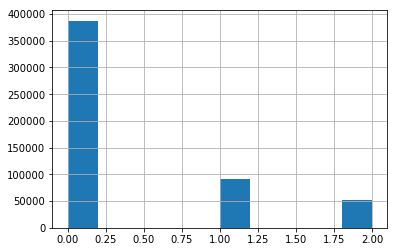

In [47]:
final.dr_bucket.hist();

In [48]:
Counter(final.buyer_centric_flag)

Counter({0: 233718, 1: 296428})

In [49]:
final.describe()

,index_x,Unnamed: 0.1,supplier_id,buyer_id,rec_id,doc_ccy_amt,tenor,grace_period,fin_tenor,to_seq_no,...,client_3m_std_fin_amt,client_3m_dr,client_3m_term,client_3m_late_days,client_3m_isLate,obs_weight_yr,test_flag_x,test_flag_y,buyer_centric_flag,dilution_amt
count,530146.000000,530146.000000,5.301460e+05,5.301460e+05,5.301460e+05,5.301460e+05,530146.000000,530146.000000,530146.000000,530146.000000,...,5.301460e+05,530146.000000,530146.000000,530146.000000,530146.000000,530146.000000,322873.000000,322873.000000,530146.000000,5.301460e+05
mean,265072.500000,175737.814815,1.001715e+08,1.001450e+08,3.392774e+09,1.445162e+07,57.600972,5.780411,62.708799,1568.445094,...,1.098822e+05,0.000002,62.135296,3.277008,0.286572,0.084103,0.300976,0.300976,0.559144,5.694950e+02
std,153040.112242,105135.592937,1.221654e+05,1.276050e+05,2.231754e+09,9.775013e+07,80.304186,19.384246,82.232595,5973.482375,...,1.374934e+06,0.000239,76.997910,14.161749,0.393282,0.017217,0.458683,0.458683,0.496490,7.182763e+04
min,0.000000,0.000000,1.000000e+08,1.000000e+08,1.020223e+06,3.000000e-02,-21.000000,0.000000,0.000000,2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,-1.235150e+05
25%,132536.250000,94595.250000,1.000163e+08,1.000161e+08,1.427385e+09,1.274260e+04,30.000000,0.000000,40.000000,34.000000,...,3.330306e+03,0.000000,41.112694,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000e+00
50%,265072.500000,173899.000000,1.002247e+08,1.001135e+08,3.339098e+09,1.167680e+05,60.000000,0.000000,52.000000,76.000000,...,9.049683e+03,0.000000,51.303325,0.000000,0.000000,0.076923,0.000000,0.000000,1.000000,0.000000e+00
75%,397608.750000,251950.750000,1.002851e+08,1.002809e+08,5.279742e+09,1.689500e+06,66.000000,0.000000,83.000000,1002.000000,...,2.206486e+04,0.000000,81.272727,2.689347,0.773893,0.090909,1.000000,1.000000,1.000000,9.063533e-01
max,530145.000000,384612.000000,1.004131e+08,1.004197e+08,7.796394e+09,1.735297e+10,2182.000000,750.000000,9030.000000,94013.000000,...,4.443162e+07,0.052632,1727.800000,1365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.808453e+07


In [50]:
Counter(final.test_split)

Counter({'test': 97177, 'train': 380532, 'validate': 52437})

In [57]:
final.to_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/data_split_flag_180116_dr.csv', index = False)

In [52]:
# final.drop(columns=['index','Unnamed: 0.1'], inplace=True)
final.reset_index(inplace = True)
final['rownum'] = final.index
final.head()

,level_0,index_x,Unnamed: 0.1,cty_code,doc_id,supplier_id,buyer_id,doc_type_code,deal_id,fin_flag,...,client_3m_term,client_3m_late_days,client_3m_isLate,obs_weight_yr,doc_date_TS,test_flag_x,test_flag_y,test_split,buyer_centric_flag,dilution_amt
0,0,61867,335680,SP,113NT3SXHF-19069,100010823,100004692.0,INV,TF540B0037,Y,...,0.000000,0.000000,0.00000,0.166667,2008-11-03,NaN,NaN,train,1,0.000000
1,1,41315,25138,SG,113NT3SXHF-2564,100004586,100015181.0,INV,TF540S0646,Y,...,105.000000,0.000000,0.00000,0.166667,2008-11-27,NaN,NaN,train,0,-1098.634391
2,2,41316,25139,SG,113NT3SXHF-5029,100004586,100015182.0,INV,TF540S0648,Y,...,100.000000,0.000000,0.00000,0.166667,2008-11-27,NaN,NaN,train,0,-1352.165404
3,3,41655,25140,SG,113XBHSBFT-10433,100004672,100004535.0,INV,TF540S0001,Y,...,80.009709,1.378641,0.23301,0.166667,2009-02-02,NaN,NaN,train,0,13891.830000
4,4,41653,25142,SG,113XBHSBFT-10599,100004672,100002504.0,INV,TF540S0001,Y,...,77.493333,1.053333,0.20000,0.166667,2009-01-21,NaN,NaN,train,0,7921.540000


In [53]:
partial = final[[x for x in list(final.columns) if (('_3m_' in x) or ('_prevyr_' in x))]]
partial.describe()

,buyer_supplier_prevyr_inv_cnt,buyer_supplier_prevyr_ave_fin_amt,buyer_supplier_prevyr_late_days,buyer_supplier_prevyr_isLate,buyer_supplier_prevyr_dr,buyer_supplier_prevyr_term,buyer_supplier_3m_inv_cnt,buyer_supplier_3m_ave_fin_amt,buyer_supplier_3m_std_fin_amt,buyer_supplier_3m_dr,...,client_prevyr_isLate,client_prevyr_dr,client_prevyr_term,client_3m_inv_cnt,client_3m_ave_fin_amt,client_3m_std_fin_amt,client_3m_dr,client_3m_term,client_3m_late_days,client_3m_isLate
count,530146.000000,5.301460e+05,530146.000000,530146.000000,5.301460e+05,530146.000000,530146.000000,5.301460e+05,5.301460e+05,5.301460e+05,...,530146.000000,5.301460e+05,530146.000000,530146.000000,5.301460e+05,5.301460e+05,530146.000000,530146.000000,530146.000000,530146.000000
mean,3013.248909,1.128300e+05,3.185683,0.286047,1.939345e-13,61.990795,3013.248909,1.128300e+05,6.377635e+04,1.679142e-13,...,0.288297,9.198352e-07,62.657022,3791.154118,1.422621e+05,1.098822e+05,0.000002,62.135296,3.277008,0.286572
std,6268.062332,2.190371e+06,14.144155,0.399146,9.496771e-12,81.308742,6268.062332,2.190371e+06,7.798844e+05,1.411488e-11,...,0.391949,5.502278e-05,81.032168,6194.405248,2.338589e+06,1.374934e+06,0.000239,76.997910,14.161749,0.393282
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,160.000000,1.206868e+03,0.000000,0.000000,0.000000e+00,41.228803,160.000000,1.206868e+03,2.166667e+03,0.000000e+00,...,0.000000,0.000000e+00,41.543945,339.000000,1.273403e+03,3.330306e+03,0.000000,41.112694,0.000000,0.000000
50%,468.000000,4.437047e+03,0.000000,0.000000,0.000000e+00,51.411727,468.000000,4.437047e+03,7.064853e+03,0.000000e+00,...,0.002581,0.000000e+00,52.611874,1122.000000,5.263819e+03,9.049683e+03,0.000000,51.303325,0.000000,0.000000
75%,1477.000000,1.449538e+04,2.802618,0.823529,0.000000e+00,83.208015,1477.000000,1.449538e+04,1.794801e+04,0.000000e+00,...,0.787462,0.000000e+00,81.802583,3757.000000,1.623727e+04,2.206486e+04,0.000000,81.272727,2.689347,0.773893
max,24594.000000,2.340783e+08,1365.000000,1.000000,8.483630e-10,1727.800000,24594.000000,2.340783e+08,5.126257e+07,1.646379e-09,...,1.000000,8.695652e-03,1727.800000,24594.000000,1.030192e+08,4.443162e+07,0.052632,1727.800000,1365.000000,1.000000


In [59]:
# feature_set=final.drop(['doc_id', 'supplier_id', 'buyer_id',  'deal_id','doc_date', 'due_date', 'fin_usd_amt', 'pymt_date',  
#                         'maturity_date', 'fin_date', 'tenor_start_date', 'fin_tenor_start_date', 'pymt_usd_amt', 
#                         'late_days', 'late_days_grace', 'isLate', 'late_days_bucket', 'dr', 'dr_bucket', 'client',
#                         'cust_id','late_days', 'late_days_grace', 'isLate', 'late_days_bucket', 
#                         'late_days_bucket_g', 'late_days_due', 'isLate_due', 'late_days_bucket_due'
#                        ], axis = 1)

# feature_set = feature_set.drop(late_days_features_for_drop, axis = 1)


feature_set = final[[
     'cty_code',
 'tenor',
 'grace_period',
 'fin_tenor',
 'product_variant_code',
 'product',
     'doc_usd_amt', 'CG',
 'buyer_supplier_yrs',
 'buyer_supplier_past_inv_cnt',
 'buyer_supplier_annual_inv_cnt',
 'buyer_supplier_ave_fin_amt',
 'buyer_supplier_ave_annual_fin_amt',
 'buyer_supplier_std_fin_amt',
 'buyer_supplier_late_days',
 'buyer_supplier_isLate',
 'buyer_supplier_dr',
 'buyer_supplier_term',
 'buyer_supplier_cty',
 'buyer_supplier_prevyr_inv_cnt',
 'buyer_supplier_prevyr_ave_fin_amt',
#  'buyer_supplier_prevyr_std_fin_amt',
 'buyer_supplier_prevyr_late_days',
 'buyer_supplier_prevyr_isLate',
#  'buyer_supplier_prevyr_dr',
 'buyer_supplier_prevyr_term',
#  'buyer_supplier_6m_inv_cnt',
#  'buyer_supplier_6m_ave_fin_amt',
#  'buyer_supplier_6m_std_fin_amt',
#  'buyer_supplier_6m_dr',
#  'buyer_supplier_6m_term',
#  'buyer_supplier_6m_late_days',
#  'buyer_supplier_6m_isLate',
 'buyer_supplier_3m_inv_cnt',
 'buyer_supplier_3m_ave_fin_amt',
 'buyer_supplier_3m_std_fin_amt',
#  'buyer_supplier_3m_dr',
 'buyer_supplier_3m_term',
 'buyer_supplier_3m_late_days',
 'buyer_supplier_3m_isLate',
 'client_yrs',
 'client_past_inv_cnt',
 'client_annual_inv_cnt',
 'client_ave_fin_amt',
 'client_ave_annual_fin_amt',
 'client_std_fin_amt',
 'client_late_days',
 'client_isLate',
 'client_dr',
 'client_term',
 'client_cty',
 'client_prevyr_inv_cnt',
 'client_prevyr_ave_fin_amt',
#  'client_prevyr_std_fin_amt',
 'client_prevyr_late_days',
 'client_prevyr_isLate',
#  'client_prevyr_dr',
 'client_prevyr_term',
#  'client_6m_inv_cnt',
#  'client_6m_ave_fin_amt',
#  'client_6m_std_fin_amt',
#  'client_6m_dr',
#  'client_6m_term',
#  'client_6m_late_days',
#  'client_6m_isLate',
 'client_3m_inv_cnt',
 'client_3m_ave_fin_amt',
 'client_3m_std_fin_amt',
#  'client_3m_dr',
 'client_3m_term',
 'client_3m_late_days',
 'client_3m_isLate',
#  'obs_weight_yr',
 'buyer_centric_flag'
]]
uncast_cols = feature_set.columns



In [ ]:
len(final.columns)

In [60]:
feature_set1=pd.get_dummies(feature_set)
feature_set1.columns

Index([u'tenor', u'grace_period', u'fin_tenor', u'doc_usd_amt',
       u'buyer_supplier_yrs', u'buyer_supplier_past_inv_cnt',
       u'buyer_supplier_annual_inv_cnt', u'buyer_supplier_ave_fin_amt',
       u'buyer_supplier_ave_annual_fin_amt', u'buyer_supplier_std_fin_amt',
       ...
       u'CG_5B', u'CG_6A', u'CG_6B', u'CG_7A', u'CG_7B', u'CG_8A', u'CG_8B',
       u'CG_9A', u'CG_9B', u'CG_NO_CG'],
      dtype='object', length=136)

In [61]:
feature_cols1 = [col for col in feature_set1.columns]
len(feature_cols1)

136

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.externals import joblib


In [63]:
# scale, joblib scaler
scaler = MinMaxScaler()
feature_set1=scaler.fit_transform(feature_set1)
joblib.dump(scaler, '/home/ec2-user/SCB_CODE/cam_code/data_180112/minmaxscaler_180116.pkl') 

['/home/ec2-user/SCB_CODE/cam_code/data_180112/minmaxscaler_180116.pkl']

In [ ]:
pd.unique(final.test_split)

In [64]:
# train_test_split
train_row = list(final[final.test_split=='train'].rownum)
test_row = list(final[final.test_split=='test'].rownum)
validate_row = list(final[final.test_split=='validate'].rownum)

In [65]:
len(train_row), len(test_row), len(validate_row)

(380532, 97177, 52437)

In [66]:
feature_set_df = pd.DataFrame(feature_set1)
len(feature_set_df), feature_set_df.head()

(530146,
         0    1         2         3    4         5         6         7    \
 0  0.064004  0.0  0.013289  0.000290  0.0  0.000016  0.000016  0.000206   
 1  0.050386  0.0  0.009967  0.000221  0.0  0.000000  0.000000  0.000000   
 2  0.050386  0.0  0.009967  0.000272  0.0  0.000000  0.000000  0.000000   
 3  0.049024  0.0  0.009635  0.000396  0.0  0.001769  0.001769  0.000082   
 4  0.050386  0.0  0.009967  0.000226  0.0  0.000243  0.000243  0.000050   
 
         8         9   ...   126  127  128  129  130  131  132  133  134  135  
 0  0.000009  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 1  0.000000  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 2  0.000000  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 3  0.000409  0.000437 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 4  0.000034  0.000232 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 
 [5 rows x 136 columns])

In [67]:
X_train = feature_set_df[feature_set_df.index.isin(train_row)]
len(X_train), X_train.head()

(380532,
         0    1         2         3    4         5         6         7    \
 0  0.064004  0.0  0.013289  0.000290  0.0  0.000016  0.000016  0.000206   
 1  0.050386  0.0  0.009967  0.000221  0.0  0.000000  0.000000  0.000000   
 2  0.050386  0.0  0.009967  0.000272  0.0  0.000000  0.000000  0.000000   
 3  0.049024  0.0  0.009635  0.000396  0.0  0.001769  0.001769  0.000082   
 4  0.050386  0.0  0.009967  0.000226  0.0  0.000243  0.000243  0.000050   
 
         8         9   ...   126  127  128  129  130  131  132  133  134  135  
 0  0.000009  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 1  0.000000  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 2  0.000000  0.000000 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 3  0.000409  0.000437 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 4  0.000034  0.000232 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 
 [5 rows x 136 columns])

In [68]:
X_test = feature_set_df[feature_set_df.index.isin(test_row)]
len(X_test), X_test.head()

(97177,
          0    1         2         3    4         5         6         7    \
 43  0.035860  0.0  0.006423  0.000201  0.0  0.008326  0.008326  0.000231   
 45  0.029505  0.0  0.008195  0.000164  0.0  0.000325  0.000325  0.000092   
 46  0.029505  0.0  0.008195  0.000130  0.0  0.000341  0.000341  0.000094   
 52  0.036768  0.0  0.006645  0.000060  0.0  0.006022  0.006022  0.000147   
 55  0.036768  0.0  0.006645  0.000023  0.0  0.006135  0.006135  0.000147   
 
          8         9   ...   126  127  128  129  130  131  132  133  134  135  
 43  0.005388  0.000457 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 45  0.000084  0.000203 ...   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
 46  0.000090  0.000200 ...   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
 52  0.002475  0.000305 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 55  0.002526  0.000306 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
 
 [5 rows x 136 columns])

In [69]:
X_validate = feature_set_df[feature_set_df.index.isin(validate_row)]
len(X_validate), X_validate.head()

(52437,            0    1         2             3    4         5         6    \
 1948  0.024512  0.0  0.003654  1.458998e-04  0.0  0.011313  0.011313   
 1949  0.034044  0.0  0.005980  1.001872e-03  0.0  0.011329  0.011329   
 1950  0.036768  0.0  0.006645  1.025593e-04  0.0  0.004772  0.004772   
 1951  0.036768  0.0  0.006645  6.226510e-05  0.0  0.004788  0.004788   
 3094  0.023604  0.0  0.006091  7.314836e-07  0.0  0.003408  0.003408   
 
            7         8         9   ...   126  127  128  129  130  131  132  \
 1948  0.000206  0.006539  0.000502 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 1949  0.000206  0.006546  0.000502 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 1950  0.001424  0.019039  0.004762 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 1951  0.001419  0.019043  0.004759 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 3094  0.000109  0.001037  0.001440 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 
       133  134  135  
 1948  0.0  0.0  1.0  
 1949  0.0  0.0  1.0  
 1950  0

In [70]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_validate = np.asarray(X_validate)

In [71]:
feature_set_df.columns=feature_cols1
feature_set_df.to_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/scaled_features_180116.csv', index = False)

In [72]:
y_train_dr = np.asarray(final[final.rownum.isin(train_row)].dr_bucket)
print(shape(y_train_dr))
y_test_dr = np.asarray(final[final.rownum.isin(test_row)].dr_bucket)
print(shape(y_test_dr))
y_validate_dr = np.asarray(final[final.rownum.isin(validate_row)].dr_bucket)
print(shape(y_validate_dr))

(380532,)
(97177,)
(52437,)


In [73]:
y_train_ld = np.asarray(final[final.rownum.isin(train_row)].late_days_bucket)
print(shape(y_train_ld))
y_test_ld = np.asarray(final[final.rownum.isin(test_row)].late_days_bucket)
print(shape(y_test_ld))
y_validate_ld = np.asarray(final[final.rownum.isin(validate_row)].late_days_bucket)
print(shape(y_validate_ld))

(380532,)
(97177,)
(52437,)


In [74]:
obs_weight_train = np.asarray(final[final.rownum.isin(train_row)].obs_weight_yr)
len(obs_weight_train)

380532

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
from time import time

In [77]:
s = time()
lr_dr = LogisticRegression(multi_class='multinomial', solver='sag', fit_intercept = False)
# lr_dr.fit(X_train,y_train_dr)
lr_dr.fit(X_train,y_train_dr,obs_weight_train)
joblib.dump(lr_dr, '/home/ec2-user/SCB_CODE/cam_code/data_180112/lr_dr_180116.pkl') 
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',lr_dr.score(X_train, y_train_dr))
print('test_score:',lr_dr.score(X_test, y_test_dr))
print('validate_score:',lr_dr.score(X_validate, y_validate_dr))
print('pred_time in minutes:', (time()-e)/60)

('train_time in minutes:', 0.4638352314631144)
('train_score:', 0.82936783240305678)
('test_score:', 0.84166006359529522)
('validate_score:', 0.84205808875412402)
('pred_time in minutes:', 0.004414665699005127)


In [82]:
coeffs = pd.DataFrame(lr_dr.coef_, columns= feature_cols1)
coeffs.to_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/DR_logreg_scores.csv')
coeffs.head()

,tenor,grace_period,fin_tenor,doc_usd_amt,buyer_supplier_yrs,buyer_supplier_past_inv_cnt,buyer_supplier_annual_inv_cnt,buyer_supplier_ave_fin_amt,buyer_supplier_ave_annual_fin_amt,buyer_supplier_std_fin_amt,...,CG_5B,CG_6A,CG_6B,CG_7A,CG_7B,CG_8A,CG_8B,CG_9A,CG_9B,CG_NO_CG
0,0.003664,-2.085607,0.194453,0.431877,0.0,0.668560,0.668560,0.139313,0.214177,0.459371,...,0.927156,0.019117,2.244978,0.714917,1.323211,0.508271,0.971111,0.726387,0.552743,1.023275
1,1.026262,1.079854,-0.241261,-0.163841,0.0,1.241234,1.241234,-0.086365,0.342401,-0.305876,...,0.300429,0.609616,-0.801094,0.039580,-0.418530,0.065189,-0.028317,0.102478,-0.028637,-0.422147
2,-1.029927,1.005753,0.046807,-0.268037,0.0,-1.909794,-1.909794,-0.052948,-0.556578,-0.153495,...,-1.227585,-0.628733,-1.443884,-0.754497,-0.904681,-0.573460,-0.942795,-0.828865,-0.524106,-0.601128


In [79]:
from sklearn.metrics import confusion_matrix as cm

In [81]:
lr_dr_train_cm = cm(y_train_dr, lr_dr.predict(X_train))
lr_dr_test_cm = cm(y_test_dr, lr_dr.predict(X_test))
lr_dr_validate_cm = cm(y_validate_dr, lr_dr.predict(X_validate))

print(lr_dr_train_cm)
print(lr_dr_test_cm)
print(lr_dr_validate_cm)

[[283133   2931    244]
 [ 48443  11595   7307]
 [   937   5069  20873]]
[[74869   499    29]
 [11460  2163  2331]
 [  158   910  4758]]
[[24721  1024    29]
 [ 2026  1681  3552]
 [  909   742 17753]]


In [83]:
s = time()
lr_dr_s = LogisticRegression(multi_class='multinomial', solver='sag', fit_intercept = False)
# lr_dr.fit(X_train,y_train_dr)
lr_dr_s.fit(X_train,y_train_dr)
joblib.dump(lr_dr_s, '/home/ec2-user/SCB_CODE/cam_code/data_180112/lr_dr_s_180116.pkl') 
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',lr_dr_s.score(X_train, y_train_dr))
print('test_score:',lr_dr_s.score(X_test, y_test_dr))
print('validate_score:',lr_dr_s.score(X_validate, y_validate_dr))
print('pred_time in minutes:', (time()-e)/60)

('train_time in minutes:', 0.5420124173164368)
('train_score:', 0.83458158577990815)
('test_score:', 0.8468053140146331)
('validate_score:', 0.86972938955317813)
('pred_time in minutes:', 0.0044530669848124186)


In [86]:
lr_dr_s_train_cm = cm(y_train_dr, lr_dr_s.predict(X_train))
lr_dr_s_test_cm = cm(y_test_dr, lr_dr_s.predict(X_test))
lr_dr_s_validate_cm = cm(y_validate_dr, lr_dr_s.predict(X_validate))

print(lr_dr_s_train_cm)
print(lr_dr_s_test_cm)
print(lr_dr_s_validate_cm)

[[283117   3001    190]
 [ 46910  13855   6580]
 [   483   5783  20613]]
[[74871   516    10]
 [11100  2844  2010]
 [   37  1214  4575]]
[[25350   423     1]
 [ 1459  2172  3628]
 [   40  1280 18084]]


In [107]:
joblib.dump(lr_dr_s, '/home/ec2-user/SCB_CODE/cam_code/data_180112/lr_dr_180116.pkl') 

['/home/ec2-user/SCB_CODE/cam_code/data_180112/lr_dr_180116.pkl']

In [109]:
#save coeffs to csv
coeffs = pd.DataFrame(lr_dr_s.coef_, columns= feature_cols1)
coeffs.to_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/DR_logreg_scores.csv')
coeffs.head()

,tenor,grace_period,fin_tenor,doc_usd_amt,buyer_supplier_yrs,buyer_supplier_past_inv_cnt,buyer_supplier_annual_inv_cnt,buyer_supplier_ave_fin_amt,buyer_supplier_ave_annual_fin_amt,buyer_supplier_std_fin_amt,...,CG_5B,CG_6A,CG_6B,CG_7A,CG_7B,CG_8A,CG_8B,CG_9A,CG_9B,CG_NO_CG
0,-3.703612,-4.333200,5.448782,1.190781,0.0,1.806672,1.806672,0.319253,2.093843,2.332744,...,1.435237,0.836888,3.243906,1.438134,1.987743,1.317768,1.705368,1.365751,1.510073,1.749776
1,3.696502,1.907162,-6.244758,-0.704749,0.0,4.010367,4.010367,-0.212936,0.575408,-1.520721,...,0.165025,0.597765,-0.981624,-0.164150,-0.607137,-0.021262,-0.073384,-0.051492,-0.022318,-0.549399
2,0.007111,2.426038,0.795976,-0.486032,0.0,-5.817038,-5.817038,-0.106317,-2.669251,-0.812023,...,-1.600263,-1.434653,-2.262283,-1.273984,-1.380607,-1.296506,-1.631984,-1.314259,-1.487754,-1.200377


In [91]:
from sklearn.ensemble import RandomForestClassifier
s = time()
rf = RandomForestClassifier()
rf.fit(X_train,y_train_dr)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',rf.score(X_train, y_train_dr))
print('test_score:',rf.score(X_test, y_test_dr))
print('validate_score:',rf.score(X_validate, y_validate_dr))
print('pred_time in minutes:', (time()-e)/60)

('train_time in minutes:', 0.28896954854329426)
('train_score:', 0.99539066359727957)
('test_score:', 0.95599781841382225)
('validate_score:', 0.6094170147033583)
('pred_time in minutes:', 0.021477317810058592)


In [98]:
rf.n_features_

136

In [92]:
print(cm(y_train_dr, rf.predict(X_train)))
print(cm(y_test_dr, rf.predict(X_test)))
print(cm(y_validate_dr, rf.predict(X_validate)))

[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]


In [97]:
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1630034564, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=955285296, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [100]:
n_estimators_list = [10,50,100,250,500,1000]
for n in n_estimators_list:
    s = time()
    rfl = RandomForestClassifier(n_estimators=n)
    rfl.fit(X_train,y_train_dr)
    e = time() 
    print('n_estimators:',n)
    print('train_time in minutes:', (e-s)/60)
    print('train_score:',rfl.score(X_train, y_train_dr))
    print('test_score:',rfl.score(X_test, y_test_dr))
    print('validate_score:',rfl.score(X_validate, y_validate_dr))
    print('pred_time in minutes:', (time()-e)/60)
    
    print(cm(y_train_dr, rf.predict(X_train)))
    print(cm(y_test_dr, rf.predict(X_test)))
    print(cm(y_validate_dr, rf.predict(X_validate)))

('n_estimators:', 10)
('train_time in minutes:', 0.28861496845881146)
('train_score:', 0.99561929088749435)
('test_score:', 0.95591549440711276)
('validate_score:', 0.55460838720750616)
('pred_time in minutes:', 0.02163709799448649)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('n_estimators:', 50)
('train_time in minutes:', 1.4695223331451417)
('train_score:', 0.99908023503936594)
('test_score:', 0.95828230960000826)
('validate_score:', 0.60998912981291831)
('pred_time in minutes:', 0.09246863524119059)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('n_estimators:', 100)
('train_time in minutes:', 2.959973665078481)
('train_score:', 0.99924053693250503)
('test_score:', 0.95896148

KeyboardInterrupt: 

In [101]:
n_estimators_list = [120,150,180]
for n in n_estimators_list:
    s = time()
    rfl = RandomForestClassifier(n_estimators=n)
    rfl.fit(X_train,y_train_dr)
    e = time() 
    print('n_estimators:',n)
    print('train_time in minutes:', (e-s)/60)
    print('train_score:',rfl.score(X_train, y_train_dr))
    print('test_score:',rfl.score(X_test, y_test_dr))
    print('validate_score:',rfl.score(X_validate, y_validate_dr))
    print('pred_time in minutes:', (time()-e)/60)
    
    print(cm(y_train_dr, rf.predict(X_train)))
    print(cm(y_test_dr, rf.predict(X_test)))
    print(cm(y_validate_dr, rf.predict(X_validate)))

('n_estimators:', 120)
('train_time in minutes:', 3.5312711517016093)
('train_score:', 0.99924316483239251)
('test_score:', 0.95872480113607128)
('validate_score:', 0.62883078742109577)
('pred_time in minutes:', 0.21552733182907105)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('n_estimators:', 150)
('train_time in minutes:', 4.379607101281484)
('train_score:', 0.99925630433183021)
('test_score:', 0.9593936836905852)
('validate_score:', 0.59749794992085736)
('pred_time in minutes:', 0.267830483118693)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]


KeyboardInterrupt: 

In [102]:
n_estimators_list = [80,90,110]
for n in n_estimators_list:
    s = time()
    rfl = RandomForestClassifier(n_estimators=n)
    rfl.fit(X_train,y_train_dr)
    e = time() 
    print('n_estimators:',n)
    print('train_time in minutes:', (e-s)/60)
    print('train_score:',rfl.score(X_train, y_train_dr))
    print('test_score:',rfl.score(X_test, y_test_dr))
    print('validate_score:',rfl.score(X_validate, y_validate_dr))
    print('pred_time in minutes:', (time()-e)/60)
    
    print(cm(y_train_dr, rf.predict(X_train)))
    print(cm(y_test_dr, rf.predict(X_test)))
    print(cm(y_validate_dr, rf.predict(X_validate)))

('n_estimators:', 80)
('train_time in minutes:', 2.3435203512509664)
('train_score:', 0.99919586263441706)
('test_score:', 0.95901293515955421)
('validate_score:', 0.69180159048000456)
('pred_time in minutes:', 0.14360090096791586)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('n_estimators:', 90)
('train_time in minutes:', 2.6222402175267536)
('train_score:', 0.99927995543081793)
('test_score:', 0.95876596313942597)
('validate_score:', 0.65232564792036163)
('pred_time in minutes:', 0.1623112996419271)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('n_estimators:', 110)
('train_time in minutes:', 3.2167808691660564)
('train_score:', 0.99927732753093035)
('test_score:', 0.959290778

In [103]:
max_features = [3,4,5]
for f in max_features:
    s = time()
    rfl = RandomForestClassifier(max_features=f, n_estimators=100)
    rfl.fit(X_train,y_train_dr)
    e = time() 
    print('n_estimators:',n)
    print('train_time in minutes:', (e-s)/60)
    print('train_score:',rfl.score(X_train, y_train_dr))
    print('test_score:',rfl.score(X_test, y_test_dr))
    print('validate_score:',rfl.score(X_validate, y_validate_dr))
    print('pred_time in minutes:', (time()-e)/60)
    
    print(cm(y_train_dr, rf.predict(X_train)))
    print(cm(y_test_dr, rf.predict(X_test)))
    print(cm(y_validate_dr, rf.predict(X_validate)))

('n_estimators:', 110)
('train_time in minutes:', 1.2044681469599405)
('train_score:', 0.99728800731607326)
('test_score:', 0.95646089095156261)
('validate_score:', 0.60129298014760568)
('pred_time in minutes:', 0.1992281675338745)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('n_estimators:', 110)
('train_time in minutes:', 1.3850981990496318)
('train_score:', 0.99770584339818991)
('test_score:', 0.95687251098510961)
('validate_score:', 0.62810610828231972)
('pred_time in minutes:', 0.1933190147082011)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('n_estimators:', 110)
('train_time in minutes:', 1.6004196325937907)
('train_score:', 0.99791607538919203)
('test_score:', 0.95732529

In [104]:
max_depth = [6,9,12]
for d in max_depth:
    s = time()
    rfl = RandomForestClassifier(max_depth= d, n_estimators=100)
    rfl.fit(X_train,y_train_dr)
    e = time() 
    print('max_depth:',d)
    print('train_time in minutes:', (e-s)/60)
    print('train_score:',rfl.score(X_train, y_train_dr))
    print('test_score:',rfl.score(X_test, y_test_dr))
    print('validate_score:',rfl.score(X_validate, y_validate_dr))
    print('pred_time in minutes:', (time()-e)/60)
    
    print(cm(y_train_dr, rf.predict(X_train)))
    print(cm(y_test_dr, rf.predict(X_test)))
    print(cm(y_validate_dr, rf.predict(X_validate)))

('max_depth:', 6)
('train_time in minutes:', 1.0151062687238057)
('train_score:', 0.83990571095203559)
('test_score:', 0.85029379379894421)
('validate_score:', 0.85676144706981716)
('pred_time in minutes:', 0.05925748348236084)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('max_depth:', 9)
('train_time in minutes:', 1.4260292689005534)
('train_score:', 0.85540506448866327)
('test_score:', 0.85973018306800997)
('validate_score:', 0.6991818753933291)
('pred_time in minutes:', 0.07943763335545857)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]


KeyboardInterrupt: 

In [105]:
max_depth = [4,5,7,8]
for d in max_depth:
    s = time()
    rfl = RandomForestClassifier(max_depth= d, n_estimators=100)
    rfl.fit(X_train,y_train_dr)
    e = time() 
    print('max_depth:',d)
    print('train_time in minutes:', (e-s)/60)
    print('train_score:',rfl.score(X_train, y_train_dr))
    print('test_score:',rfl.score(X_test, y_test_dr))
    print('validate_score:',rfl.score(X_validate, y_validate_dr))
    print('pred_time in minutes:', (time()-e)/60)
    
    print(cm(y_train_dr, rf.predict(X_train)))
    print(cm(y_test_dr, rf.predict(X_test)))
    print(cm(y_validate_dr, rf.predict(X_validate)))

('max_depth:', 4)
('train_time in minutes:', 0.7282364010810852)
('train_score:', 0.82631946853352678)
('test_score:', 0.83989009745104293)
('validate_score:', 0.84743597078398836)
('pred_time in minutes:', 0.048286616802215576)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('max_depth:', 5)
('train_time in minutes:', 0.8579320987065633)
('train_score:', 0.83342005402962172)
('test_score:', 0.84645543698611814)
('validate_score:', 0.8503728283463966)
('pred_time in minutes:', 0.052750198046366374)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]
('max_depth:', 7)
('train_time in minutes:', 1.1462383151054383)
('train_score:', 0.84630727507804859)
('test_score:', 0.85453348014447861)
(

In [106]:
s = time()
rfl = RandomForestClassifier(max_depth= 6, n_estimators=100)
rfl.fit(X_train,y_train_dr)
e = time() 
print('max_depth:',d)
print('train_time in minutes:', (e-s)/60)
print('train_score:',rfl.score(X_train, y_train_dr))
print('test_score:',rfl.score(X_test, y_test_dr))
print('validate_score:',rfl.score(X_validate, y_validate_dr))
print('pred_time in minutes:', (time()-e)/60)

print(cm(y_train_dr, rf.predict(X_train)))
print(cm(y_test_dr, rf.predict(X_test)))
print(cm(y_validate_dr, rf.predict(X_validate)))

('max_depth:', 8)
('train_time in minutes:', 1.0068511843681336)
('train_score:', 0.84028675643572681)
('test_score:', 0.85001595027629995)
('validate_score:', 0.85689494059538107)
('pred_time in minutes:', 0.059402501583099364)
[[286263     39      6]
 [   584  66550    211]
 [    42    872  25965]]
[[74961   430     6]
 [ 1341 13544  1069]
 [   22  1408  4396]]
[[21233  4540     1]
 [  767  5397  1095]
 [   88 13990  5326]]


In [108]:
joblib.dump(rfl, '/home/ec2-user/SCB_CODE/cam_code/data_180112/lr_rf_180116.pkl') 

['/home/ec2-user/SCB_CODE/cam_code/data_180112/lr_rf_180116.pkl']

In [111]:
#dr predictions after model
dr_pred_rf = rfl.predict(feature_set1)
dr_rf_prob = rfl.predict_proba(feature_set1)

dr_rf_preds = [[final.doc_id[i], dr_pred_rf[i], dr_rf_prob[i][0], dr_rf_prob[i][1],dr_rf_prob[i][2]] for i in range(len(all_prod))]

dr_rf_preds = pd.DataFrame(dr_rf_preds, columns = ['doc_id', 'dilution_predict', 'dilution_predict_0',
      'dilution_prob_1', 'dilution_prob_2'])

dr_rf_preds.head()



,doc_id,dilution_predict,dilution_predict_0,dilution_prob_1,dilution_prob_2
0,113NT3SXHF-19069,0,0.788285,0.177737,0.033978
1,113NT3SXHF-2564,0,0.721605,0.194411,0.083983
2,113NT3SXHF-5029,0,0.733595,0.184587,0.081818
3,113XBHSBFT-10433,2,0.317518,0.215679,0.466803
4,113XBHSBFT-10599,2,0.272545,0.218451,0.509004


In [113]:
dr_rf_preds.to_csv('/home/ec2-user/SCB_CODE/cam_code/data_180112/dr_predict_180116.csv')

In [ ]:
# ROC AUC curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(num=None, figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')

# X = feature_set1[validate_row]
# y = data.dr_bucket[validate_row]

X = X_validate
y = y_validate_dr

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

y_scored = lr_dr_predict[validate_row]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_scored[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['aqua', 'darkorange', 'cornflowerblue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = 2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [ ]:
len(gb.feature_importances_)

In [ ]:
#save feature importance into list
dr_bucket_feature_importances = gb.feature_importances_.tolist()
type(dr_bucket_feature_importances)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
s = time()
lr = LogisticRegression(multi_class='multinomial', solver='sag', fit_intercept = False)
lr.fit(X_train,y_train)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',lr.score(X_train, y_train))
print('test_score:',lr.score(X_test, y_test))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
from collections  import Counter

In [ ]:
#weighted logistic regression

label=list(final['dr_bucket'])
X_train, X_test, y_train, y_test = train_test_split(feature_set, label, test_size=0.2, random_state=42)


In [ ]:
Counter(label)

In [ ]:
len(label)

In [ ]:
weights = {0: 568275*1./805706*1., 1: 219533*1./805706*1., 2: 17898*1./805706*1.}
weights

In [ ]:
s = time()
lrw = LogisticRegression(multi_class='multinomial', solver='saga', fit_intercept = True, class_weight = weights)
lrw.fit(X_train,y_train)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',lrw.score(X_train, y_train))
print('test_score:',lrw.score(X_test, y_test))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
# DR regression:
# from sklearn.linear_model import ElasticNet

# label=list(final['dr'])
# X_train, X_test, y_train, y_test = train_test_split(feature_set, label, test_size=0.2, random_state=42)

regr = ElasticNet( l1_ratio = 0.7, alpha = 0.5)
regr.fit(X_train, y_train)
print('train_time in minutes:', (e-s)/60)
print('train_score:',regr.score(X_train, y_train))
print('test_score:',regr.score(X_test, y_test))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
regr_pred = regr.predict(feature_set)
Counter(regr_pred)

In [ ]:
regr_pred = regr.predict(feature_set)
regr_bucket = np.where(regr_pred>0.05,2, np.where(regr_pred>0,1,0))

regr_bucket
sum([act==pred for act,pred in zip(final.dr_bucket, regr_bucket)])*1./len(regr_pred)*1.

In [ ]:
regr_bucket = [2 if pred>0.05 else 1 if pred>0 else 0 for pred in regr_pred]
sum([act==pred for act,pred in zip(final.dr_bucket, regr_bucket)])*1./len(regr_pred)*1.

In [ ]:

Counter(regr_pred)

In [ ]:
plt.hist(regr_pred)

In [ ]:
lr.coef_.shape

In [ ]:
coeffs = pd.DataFrame(lr.coef_, columns= feature_cols)
coeffs.to_csv('DR_logreg_scores.csv')
coeffs.head()

In [ ]:
coeffs.to_csv('DR_logreg_scores.csv')

In [ ]:
coeffs.plot.bar()

In [ ]:
%pylab inline

In [ ]:
scaled = pd.DataFrame(feature_set, columns=feature_cols)
scaled.head()

In [ ]:
scaled.to_csv('features_scaled.csv')

In [ ]:
lr.get_params()

In [ ]:
# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pcad = pca.fit_transform(feature_set)
pca_vars = pca.explained_variance_ratio_

pca_vars




In [ ]:
pca_cum = np.cumsum(pca_vars)
plt.plot(pca_vars)
plt.plot(pca_cum)

In [ ]:
pca_features = pcad[:,:50]
label=list(final['dr_bucket'])
X_train, X_test, y_train, y_test = train_test_split(pca_features, label, test_size=0.2, random_state=42)
shape(X_train),len(y_test)



In [ ]:
s = time()
lrw = LogisticRegression(multi_class='multinomial', solver='sag', fit_intercept = True, class_weight = weights)
lrw.fit(X_train,y_train)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',lrw.score(X_train, y_train))
print('test_score:',lrw.score(X_test, y_test))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
s = time()
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',gb.score(X_train, y_train))
print('test_score:',gb.score(X_test, y_test))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
print('train_time in minutes:', (e-s)/60)
print('train_score:',gb.score(X_train, y_train))
print('test_score:',gb.score(X_test, y_test))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
#GridSearch for dilution buckets
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'max_features':[3,4,5,],'max_depth':[3,6,9]}
gb=GradientBoostingClassifier()
clf_gb = GridSearchCV(gb, parameters,n_jobs=-1)
clf_gb.fit(X_train, y_train)
print ("GB best score and model")
print (clf_gb.best_score_)
print (clf_gb.best_estimator_)
print ("Testing Score:")
print (r2_score(y_test, clf_gb.predict(X_test)))
#joblib.dump(clf, 'Dilution_models1/ifnb_RF.pkl')

In [ ]:
print ("GB best score and model")
print (clf_gb.best_score_)
print (clf_gb.best_estimator_)

In [ ]:
#GridSearch for dilution buckets
# from sklearn.ensemble import GradientBoostingClassifier
s = time()
parameters = {'max_features':[4],'max_depth':[9,10,12],'learning_rate':[1,0.5,0.25] }
gb=GradientBoostingClassifier()
clf_gb = GridSearchCV(gb, parameters,n_jobs=-1)
clf_gb.fit(X_train, y_train)
print ("GB best score and model")
print (clf_gb.best_score_)
print (clf_gb.best_estimator_)
print ("Testing Score:")
print (r2_score(y_test, clf_gb.predict(X_test)))
#joblib.dump(clf, 'Dilution_models1/ifnb_RF.pkl')
e = time() 
print('train_time in minutes:', (e-s)/60)


In [ ]:
print ("GB best score and model")
print (clf_gb.best_score_)
print (clf_gb.best_estimator_)

In [ ]:
print('train_time in minutes:', (e-s)/60)

In [ ]:
s = time()
gb1 = GradientBoostingClassifier(learning_rate=0.5, max_depth=12,max_features=4)
gb1.fit(X_train1,y_train1)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',gb1.score(X_train1, y_train1))
print('test_score:',gb.score(X_test1, y_test1))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
print('train_time in minutes:', (e-s)/60)
print('train_score:',gb1.score(X_train1, y_train1))
print('test_score:',gb1.score(X_test1, y_test1))
print('pred_time in minutes:', (time()-e)/60)

#predictions after GridSearch
dr_pred_gb = clf_gb.predict(feature_set)
dr_gb_prob = clf_gb.best_estimator_.predict_proba(feature_set)
shape(clf_gb.best_estimator_.feature_importances_)

dr_gb_preds = [[final.invoice_id[i], dr_pred_gb[i], dr_gb_prob[i][0], dr_gb_prob[i][1],dr_gb_prob[i][2]] for i in range(len(all_prod))]

dr_gb_preds = pd.DataFrame(dr_gb_preds, columns = ['invoice_id', 'dilution_predict', 'dilution_predict_0',
       'dilution_prob_1', 'dilution_prob_2'])

dr_gb_preds.head()

In [ ]:
#dr predictions after model
dr_pred_gb = gb1.predict(feature_set1)
dr_gb_prob = gb1.predict_proba(feature_set1)

dr_gb_preds = [[final.doc_id[i], dr_pred_gb[i], dr_gb_prob[i][0], dr_gb_prob[i][1],dr_gb_prob[i][2]] for i in range(len(all_prod))]

dr_gb_preds = pd.DataFrame(dr_gb_preds, columns = ['doc_id', 'dilution_predict', 'dilution_predict_0',
       'dilution_prob_1', 'dilution_prob_2'])

dr_gb_preds.head()

In [ ]:
dr_gb_preds.to_csv('dr_predict_180101')

In [ ]:
Counter(final.dr_bucket)

In [ ]:
Counter(dr_pred_gb)

In [ ]:
label=list(final['dr_bucket'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(feature_set1, label, test_size=0.2, random_state=42)

In [ ]:
s = time()
weights={0: 0.1, 1: 0.4, 2: 0.7}
lrw = LogisticRegression(multi_class='multinomial', solver='sag', fit_intercept = False, class_weight = None)
lrw.fit(X_train2,y_train2)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',lr2w.score(X_train2, y_train2))
print('test_score:',lr2w.score(X_test2, y_test2))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
coeffs = pd.DataFrame(l2w.coef_, columns= feature_cols1)
coeffs.to_csv('DR_logreg_scores.csv')
coeffs.head()

In [ ]:
gb1_scores = gb1.feature_importances_.tolist()
gb1_scores = np.reshape(np.asarray(gb1_scores),(1,174))
gb1_dr_scores = pd.DataFrame( gb1_scores, columns= feature_cols1)
gb1_dr_scores.to_csv('DR_GB_scores_180102.csv')

### Predict isLate

In [ ]:
final['late_days_bucket'] = np.where(final.late_days_bucket==-1,0,final.late_days_bucket)
label=list(final['late_days_bucket'])
set(label)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(feature_set1, label, test_size=0.2, random_state=42)

In [ ]:
s = time()
lr = LogisticRegression(multi_class='multinomial', solver='sag', fit_intercept = False)
lr.fit(X_train,y_train)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',gb.score(X_train, y_train))
print('test_score:',gb.score(X_test, y_test))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
s = time()
lr2 = LogisticRegression(multi_class='multinomial', solver='sag', fit_intercept = False)
lr2.fit(X_train2,y_train2)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',lr2.score(X_train2, y_train2))
print('test_score:',lr2.score(X_test2, y_test2))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
s = time()
weights={0: 751835*1./805706*1., 1: 48307*1./805706*1., 2: 5564*1./805706*1.}
lr2w = LogisticRegression(multi_class='multinomial', solver='sag', fit_intercept = False, class_weight = 'balanced')
lr2w.fit(X_train2,y_train2)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',lr2w.score(X_train2, y_train2))
print('test_score:',lr2w.score(X_test2, y_test2))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
s = time()
weights={0: 0.1, 1: 0.4, 2: 0.7}
lr2w = LogisticRegression(multi_class='multinomial', solver='sag', fit_intercept = False, class_weight = weights)
lr2w.fit(X_train2,y_train2)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',lr2w.score(X_train2, y_train2))
print('test_score:',lr2w.score(X_test2, y_test2))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
coeffs = pd.DataFrame(lr2w.coef_, columns= feature_cols1)
coeffs.to_csv('LD_logreg_scores.csv')
coeffs.head()

In [ ]:
#isLate predictions after model
isLate_pred_gb = lr2w.predict(feature_set1)
isLate_gb_prob = lr2w.predict_proba(feature_set1)

isLate_gb_prob

In [ ]:
isLate_gb_prob[5][2]

In [ ]:
isLate_gb_preds = [[final.doc_id[i], isLate_pred_gb[i], isLate_gb_prob[i][0], 
                    isLate_gb_prob[i][1], isLate_gb_prob[i][2]] for i in range(len(all_prod))]

isLate_gb_preds = pd.DataFrame(isLate_gb_preds, columns = ['doc_id', 'isLate_predict', 'late_prob_0', 'late_prob_1', 'late_prob_2'])

isLate_gb_preds.head()

In [ ]:
Counter(isLate_pred_gb)

In [ ]:
Counter(final.late_days_bucket)

In [ ]:
#run model
s = time()
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',gb.score(X_train, y_train))
print('test_score:',gb.score(X_test, y_test))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
print('train_score:',gb.score(X_train, y_train))
print('test_score:',gb.score(X_test, y_test))

In [ ]:
s = time()
gb2 = GradientBoostingClassifier(learning_rate=0.5, max_depth=12,max_features=4)
gb2.fit(X_train2,y_train2)
e = time() 
print('train_time in minutes:', (e-s)/60)
print('train_score:',gb2.score(X_train2, y_train2))
print('test_score:',gb2.score(X_test2, y_test2))
print('pred_time in minutes:', (time()-e)/60)

In [ ]:
#GridSearch for dilution buckets
# from sklearn.ensemble import GradientBoostingClassifier
s = time()
parameters = {'max_features':[3,4,5],'max_depth':[9,10,12],'learning_rate':[1,0.5,0.25] }
gb3=GradientBoostingClassifier()
clf_gbl = GridSearchCV(gb3, parameters,n_jobs=-1)
clf_gbl.fit(X_train2, y_train2)
print ("GB best score and model")
print (clf_gbl.best_score_)
print (clf_gbl.best_estimator_)
print ("Testing Score:")
print (r2_score(y_test2, clf_gbl.predict(X_test2)))
#joblib.dump(clf, 'Dilution_models1/ifnb_RF.pkl')
e = time() 
print('train_time in minutes:', (e-s)/60)


In [ ]:
print ("GB best score and model")
print (clf_gbl.best_score_)
print (clf_gbl.best_estimator_)
print ("Testing Score:")
print (r2_score(y_test2, clf_gb.predict(X_test2)))
#joblib.dump(clf, 'Dilution_models1/ifnb_RF.pkl')
e = time() 
print('train_time in minutes:', (e-s)/60)

In [ ]:
#save feature importance into
isLate_bucket_feature_importances = gb2.feature_importances_.tolist()
len(isLate_bucket_feature_importances)


In [ ]:
#isLate predictions after model
isLate_pred_gb = gb2.predict(feature_set1)
isLate_gb_prob = gb2.predict_proba(feature_set1)

isLate_gb_preds = [[final.doc_id[i], isLate_pred_gb[i], isLate_gb_prob[i][0], 
                    isLate_gb_prob[i][1]] for i in range(len(all_prod))]

isLate_gb_preds = pd.DataFrame(isLate_gb_preds, columns = ['doc_id', 'isLate_predict', 'late_prob_0', 'late_prob_1'])

isLate_gb_preds.head()

In [ ]:
isLate_gb_prob

In [ ]:
len(pd.unique(final.doc_id))

In [ ]:
%pylab inline

### Next save to csv:
All_score, all_pred, all_pred fit to Tableau

In [ ]:
all_score = pd.DataFrame(data={'features':feature_cols,'dr_weights':dr_bucket_feature_importances, 'islate_weights': isLate_bucket_feature_importances})
all_score.head()

In [ ]:
all_score = pd.DataFrame(data={'features':feature_cols1,'dr_weights':dr_bucket_feature_importances, 'islate_weights': isLate_bucket_feature_importances})
all_score.head()

In [ ]:
all_score.sort_values('dr_weights', ascending=False).head(10)

In [ ]:
all_score.sort_values('islate_weights', ascending=False).head(10)

In [ ]:
all_score=all_score[['features','dr_weights','islate_weights']]
all_score.to_csv('all_score_1210.csv')

In [ ]:
all_prod.head()

In [ ]:
len(all_prod), len(dr_gb_preds), len(isLate_gb_preds)

In [ ]:
all_prod_pred = pd.concat([all_prod, dr_gb_preds, isLate_gb_preds], axis=1, join='inner')
len(all_prod_pred)

In [ ]:
all_prod_pred.to_csv('all_prod_pred_180102.csv')

In [ ]:
%pylab inline

In [ ]:
pd.crosstab(all_prod_pred.late_days_bucket,all_prod_pred.isLate_predict)

In [ ]:
max(all_prod_pred.pymt_value_date)

In [ ]:
len(all_prod_pred)

In [ ]:
all_prod_pred[all_prod_pred.late_days>300].late_days.hist()

In [ ]:
features_scaled = pd.DataFrame(feature_set1, columns=feature_cols1)
features_scaled.to_csv('features_scaled_180102.csv')
features_scaled.head()

In [ ]:
all_prod_pred[all_prod_pred.late_days>3000][['doc_id','pymt_value_date', 'maturity_date']]
# all_prod_pred.maturity_date

In [ ]:
1+1